In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

Definimos la ruta donde se encuentran los datos de entrenamiento y de prueba

In [2]:
path = ("C:/kaggle/pets/PetImages")

In [3]:
path_cat = path + "/Cat"
path_dog = path + "/Dog"

In [4]:
os.listdir(path)

['Cat', 'Dog']

En la carpeta "Cat" se encuentran las imagenes de gatos y en la carpeta "Dog" se encuentran las imagenes de perros

In [5]:
os.listdir(path_cat)

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '1001.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '1002.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '1003.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10036.jpg',
 '10037.jpg',
 '10038.jpg',
 '10039.jpg',
 '1004.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '1005.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10055.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '1006.jpg',
 '10060.jpg',
 '10061.jpg'

Cada imagen tiene diferente tamaño, por lo que debemos redimensionarlas a un tamaño fijo para poder trabajar con ellas, vamos a redimensionarlas a un tamaño de 255x255

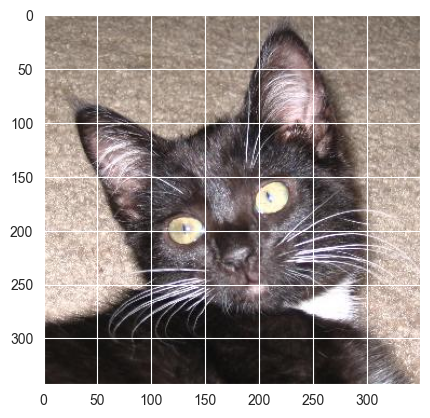

In [6]:
img = plt.imread(path_cat + "/102.jpg")
plt.imshow(img)
plt.show()

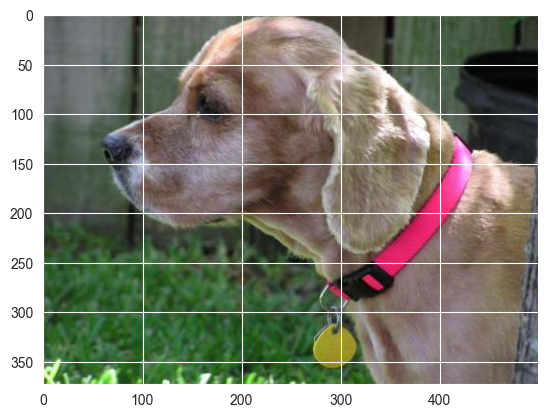

In [7]:
img = plt.imread(path_dog + "/102.jpg")
plt.imshow(img)
plt.show()

Bien, la idea es contruir nuestro prerceptron desde 0 de manera que podamos clasificar las imagenes en dos clases: Gatos y Perros. Para ello vamos a seguir los siguientes pasos:

In [428]:
# Cargamos los datos

size = 128

num_img = 2000

def load_dataset():
    X = []
    y = []
    for i in range(num_img):
        try:
            img = Image.open(os.path.join(path_cat, f"{i}.jpg")).resize((size, size))
            img = img.convert('RGB')  
            X.append(np.array(img))
            y.append(1)
        except Exception as e:
            print(f"Error loading image {i} from Cat: {e}")
    for i in range(num_img):
        try:
            img = Image.open(os.path.join(path_dog, f"{i}.jpg")).resize((size, size))
            img = img.convert('RGB')  
            X.append(np.array(img))
            y.append(0)
        except Exception as e:
            print(f"Error loading image {i} from Dog: {e}")
    return np.array(X), np.array(y)

In [429]:
X, y = load_dataset()

Error loading image 666 from Cat: cannot identify image file 'C:\\kaggle\\pets\\PetImages\\Cat\\666.jpg'


In [430]:
X.shape, y.shape

((3999, 128, 128, 3), (3999,))

Clase:  1


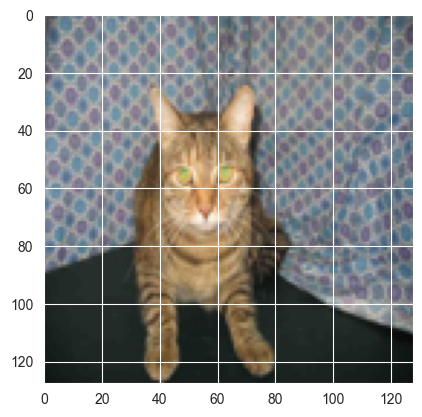

In [431]:
# Probamos algunos datos
index = 500
plt.imshow(X[index])
print("Clase: ", y[index])

In [432]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y, shuffle=True)

In [433]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3199, 128, 128, 3), (3199,), (800, 128, 128, 3), (800,))

Clase:  0


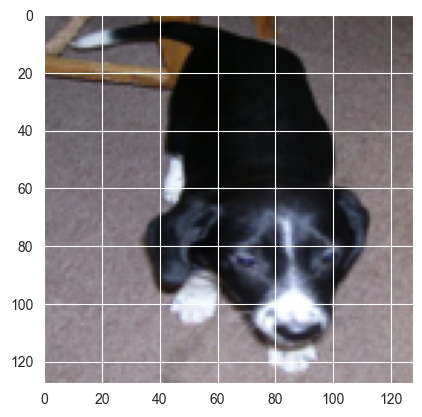

In [434]:
index = 181
plt.imshow(X_train[index])
print("Clase: ", y_train[index])

In [435]:
m_train = len(y_train)
m_test = len(y_test)
num_p_x = len(X_train[0])

print("Numero de ejemplos de entrenamiento: ", m_train)
print("Numero de ejemplos de prueba: ", m_test)
print("Numero de pixeles: ", num_p_x)
print("Tamaño de cada imagen: ", X_train[0].shape)
print("Tamaño de datos de entrenamiento: ", X_train.shape) 
print("Tamaño de datos de prueba: ", X_test.shape)

Numero de ejemplos de entrenamiento:  3199
Numero de ejemplos de prueba:  800
Numero de pixeles:  128
Tamaño de cada imagen:  (128, 128, 3)
Tamaño de datos de entrenamiento:  (3199, 128, 128, 3)
Tamaño de datos de prueba:  (800, 128, 128, 3)


In [436]:
train_set_X_flatten = X_train.reshape(X_train.shape[0], -1).T
test_set_X_flatten = X_test.reshape(X_test.shape[0], -1).T

print("Tamaño de datos de entrenamiento: ", train_set_X_flatten.shape)
print("Tamaño de datos de prueba: ", test_set_X_flatten.shape)

Tamaño de datos de entrenamiento:  (49152, 3199)
Tamaño de datos de prueba:  (49152, 800)


In [437]:
# Estandarizamos los datos
train_set_X = train_set_X_flatten/255.
test_set_X = test_set_X_flatten/255.

In [438]:
###############
# 
# X_flatten = X.reshape(X.shape[0], -1).T
# X_flatten = X_flatten / 255.
# X_train, X_test, y_train, y_test = train_test_split(X_flatten.T, y, test_size=0.2, random_state=42)
# X_train = X_train.T
# X_test = X_test.T
# y_train = y_train.reshape(1, -1)
# y_test = y_test.reshape(1, -1)


# Forward And propagation

In [439]:
# definimos la funcion sigmoid
def sigmoid(x):
    '''
    :param x: numpy array n x m 
    :return: numpy array n x m
    '''
    return 1/(1 + np.exp(-x))

In [440]:
def sigmoid_derivate(x):
    '''
    :param x: numpy array n x m
    :return: numpy array n x m
    '''
    return sigmoid(x)*(1 - sigmoid(x))

In [441]:
def initialize_parameters(dim):
    '''
    :param dim: tamaño de los parametros
    :return: diccionario con los parametros inicializados
    '''
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b

In [442]:
def propagation(w, b, X, Y):#, lambda_ = 0.1):
    '''
    :param w: numpy array n x 1
    :param b: float
    :param X: numpy array n x m
    :param Y: numpy array n x 1
    :return: 
    grad: diccionario de los gradientes de los pesos y el bias
    cost: costo de la regresion logistica
    '''
    m = X.shape[1] ###
    z = np.dot(w.T, X) + b
    A = sigmoid(z)
    # cost = -1/m * np.sum(Y*np.log(A) + (1 - Y)*np.log(1 - A))
    
    # epsilon = 1e-30
    # cost = -1/m * np.sum(Y * np.log(A + epsilon) + (1 - Y) * np.log(1 - A + epsilon))
    cost = (-1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) #+ (lambda_ / (2*m)) * np.sum(np.square(w))
    
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)
    
    grad = {"dw": dw, "db": db}
    
    return grad, cost

In [443]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    '''
    :param w: numpy array n x 1
    :param b: float
    :param X: numpy array n x m
    :param Y: numpy array n x 1
    :param num_iterations: numero de iteraciones
    :param learning_rate: tasa de aprendizaje
    :return: 
    params: diccionario de los parametros
    grads: diccionario de los gradientes
    costs: lista de los costos
    '''
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    for i in range(num_iterations):
        
        grad, cost = propagation(w, b, X, Y)
        dw = grad["dw"]
        db = grad["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            print("Costo despues de iteracion %i: %f" %(i, cost))
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs

In [444]:
def predict (w, b, X):
    '''
    :param w: numpy array n x 1
    :param b: float
    :param X: numpy array n x m
    :return: numpy array n x 1
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        
    return Y_prediction

In [445]:
def model(X_train, y_train, X_test, y_test, num_iterations, learning_rate):
    '''
    :param X_train: numpy array n x m
    :param y_train: numpy array n x 1
    :param X_test: numpy array n x m
    :param y_test: numpy array n x 1
    :param num_iterations: numero de iteraciones
    :param learning_rate: tasa de aprendizaje
    :return: 
    d: diccionario de los parametros
    '''
    w, b = initialize_parameters(X_train.shape[0]) 
    
    params, grads, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate)
    w = params["w"]
    b = params["b"]
    
    y_prediction_test = predict(w, b, X_test)
    y_prediction_train = predict(w, b, X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    d = {"costs": costs, "y_prediction_test": y_prediction_test, "y_prediction_train": y_prediction_train, "w": w, "b": b, "learning_rate": learning_rate, "num_iterations": num_iterations}
    
    return d

In [446]:
logistic_model_regresion = model(train_set_X, y_train, test_set_X, y_test, num_iterations = 100000, learning_rate = 0.0005)

Costo despues de iteracion 0: 0.693147
Costo despues de iteracion 100: 0.674912
Costo despues de iteracion 200: 0.665790
Costo despues de iteracion 300: 0.659272
Costo despues de iteracion 400: 0.654076
Costo despues de iteracion 500: 0.649691
Costo despues de iteracion 600: 0.645849
Costo despues de iteracion 700: 0.642393
Costo despues de iteracion 800: 0.639225
Costo despues de iteracion 900: 0.636280
Costo despues de iteracion 1000: 0.633513
Costo despues de iteracion 1100: 0.630891
Costo despues de iteracion 1200: 0.628393
Costo despues de iteracion 1300: 0.626000
Costo despues de iteracion 1400: 0.623698
Costo despues de iteracion 1500: 0.621479
Costo despues de iteracion 1600: 0.619332
Costo despues de iteracion 1700: 0.617251
Costo despues de iteracion 1800: 0.615231
Costo despues de iteracion 1900: 0.613267
Costo despues de iteracion 2000: 0.611355
Costo despues de iteracion 2100: 0.609491
Costo despues de iteracion 2200: 0.607672
Costo despues de iteracion 2300: 0.605895
Cost

In [373]:
X_train.shape[0], train_set_X_flatten.shape[0]

(1599, 49152)

y = 1, prediccion = 1


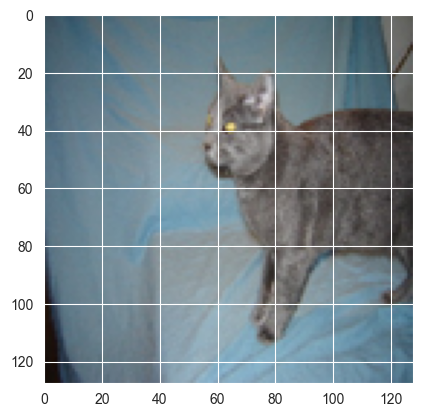

In [447]:
# Ejemplo de prediccion
index = 4
plt.imshow(test_set_X[:,index].reshape((size, size, 3)))
print ("y = " + str(y_test[index]) + ", prediccion = " + str(int(logistic_model_regresion["y_prediction_test"][0,index])))

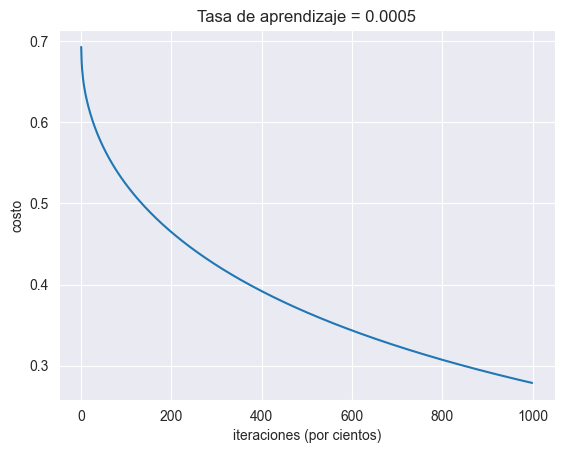

In [448]:
# Grafica de la funcion de costo
costs = np.squeeze(logistic_model_regresion['costs'])
plt.plot(costs)
plt.ylabel('costo')
plt.xlabel('iteraciones (por cientos)')
plt.title("Tasa de aprendizaje = " + str(logistic_model_regresion["learning_rate"]))
plt.show()

prediccion = 1.0


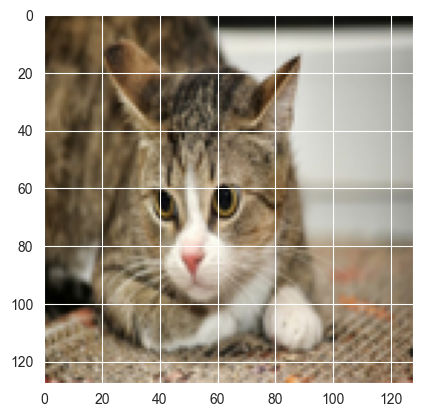

In [449]:
# Prueba con una imagen militar
path_my_image = "imagenes/gato1.jpeg"
image = np.array(Image.open(path_my_image).resize((size, size)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, size * size * 3)).T
my_predicted_image = predict(logistic_model_regresion["w"], logistic_model_regresion["b"], image)

print("prediccion = " + str(np.squeeze(my_predicted_image)))

prediccion = 0.0


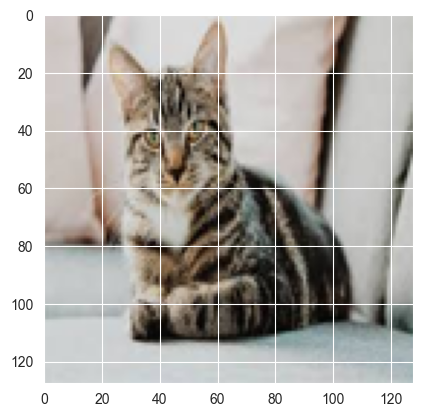

In [450]:
# Prueba con una imagen que no es militar
path_my_image = "imagenes/gato2.jpeg"
image = np.array(Image.open(path_my_image).resize((size, size)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, size * size * 3)).T
my_predicted_image = predict(logistic_model_regresion["w"], logistic_model_regresion["b"], image)

print("prediccion = " + str(np.squeeze(my_predicted_image)))

prediccion = 1.0


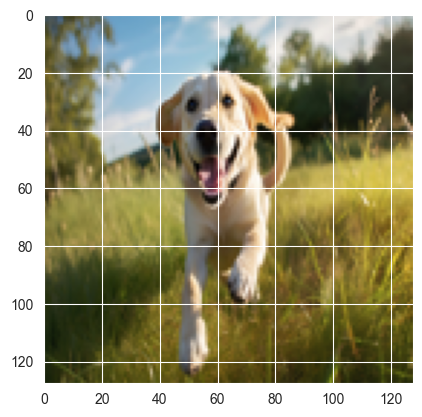

In [451]:
# Prueba con una imagen que no es militar
path_my_image = "imagenes/perro1.jpg"
image = np.array(Image.open(path_my_image).resize((size, size)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, size * size * 3)).T
my_predicted_image = predict(logistic_model_regresion["w"], logistic_model_regresion["b"], image)

print("prediccion = " + str(np.squeeze(my_predicted_image)))

prediccion = 1.0


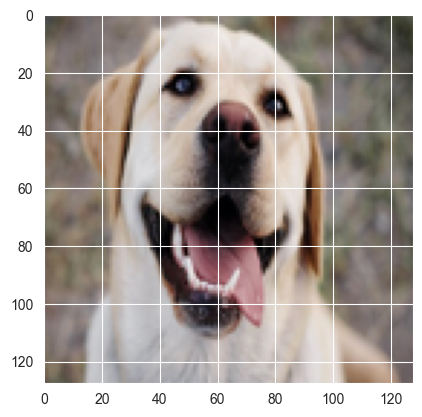

In [452]:
# Prueba con una imagen que no es militar
path_my_image = "imagenes/perro2.jpeg"
image = np.array(Image.open(path_my_image).resize((size, size)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, size * size * 3)).T
my_predicted_image = predict(logistic_model_regresion["w"], logistic_model_regresion["b"], image)

print("prediccion = " + str(np.squeeze(my_predicted_image)))

prediccion = 1.0


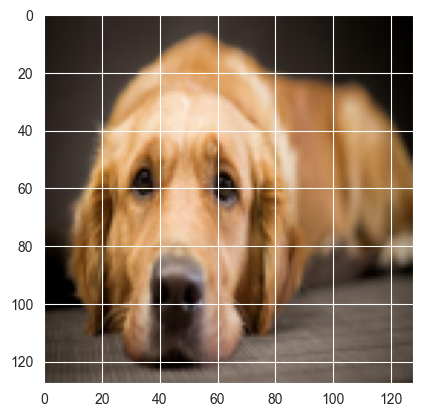

In [453]:

# Prueba con una imagen que no es militar
path_my_image = "imagenes/perro3.jpeg"
image = np.array(Image.open(path_my_image).resize((size, size)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, size * size * 3)).T
my_predicted_image = predict(logistic_model_regresion["w"], logistic_model_regresion["b"], image)

print("prediccion = " + str(np.squeeze(my_predicted_image)))

prediccion = 1.0


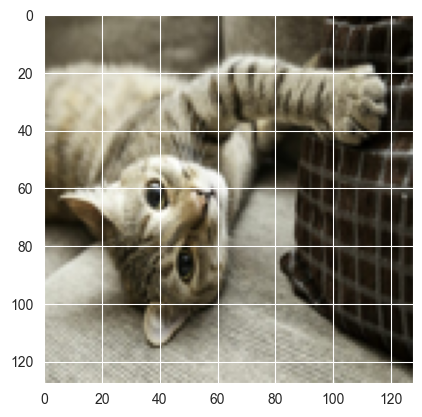

In [454]:
# Prueba con una imagen que no es militar
path_my_image = "imagenes/gato3.jpeg"
image = np.array(Image.open(path_my_image).resize((size, size)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, size * size * 3)).T
my_predicted_image = predict(logistic_model_regresion["w"], logistic_model_regresion["b"], image)

print("prediccion = " + str(np.squeeze(my_predicted_image)))

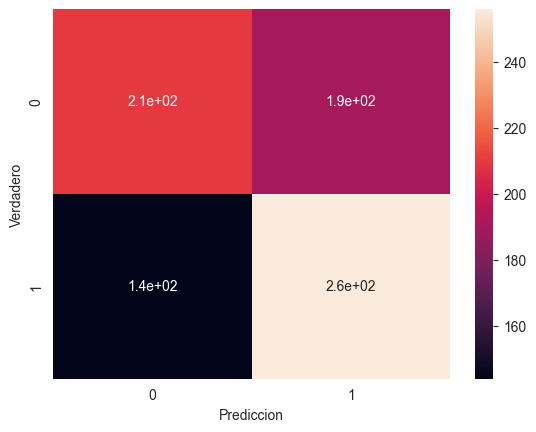

In [456]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, logistic_model_regresion["y_prediction_test"][0])
sns.heatmap(cm, annot=True)
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')
plt.show()

y = 0, prediccion = 1


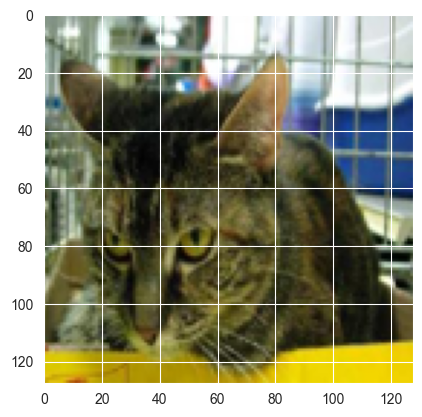

y = 1, prediccion = 0


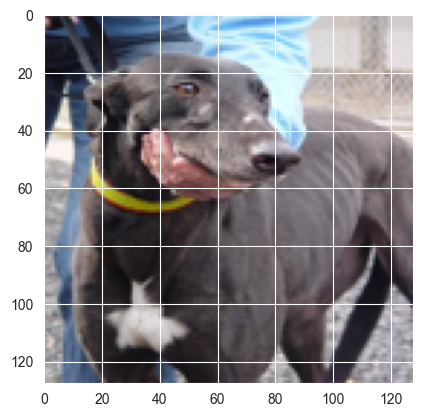

y = 0, prediccion = 0


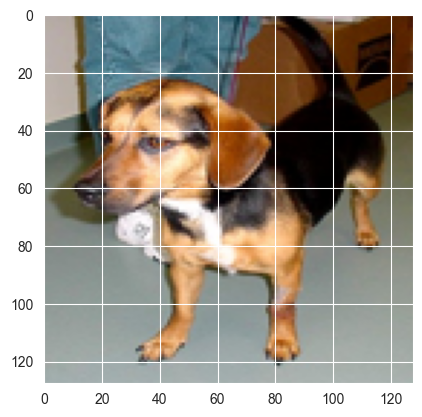

y = 0, prediccion = 1


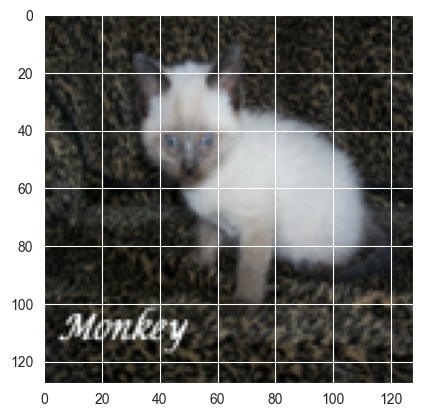

y = 1, prediccion = 1


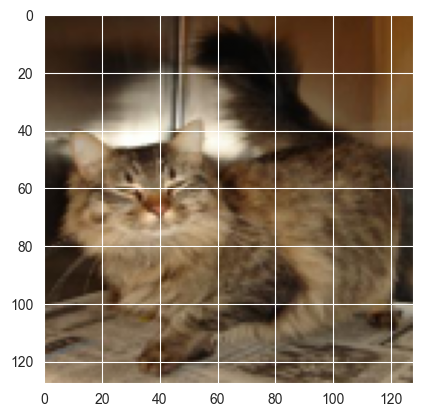

y = 0, prediccion = 0


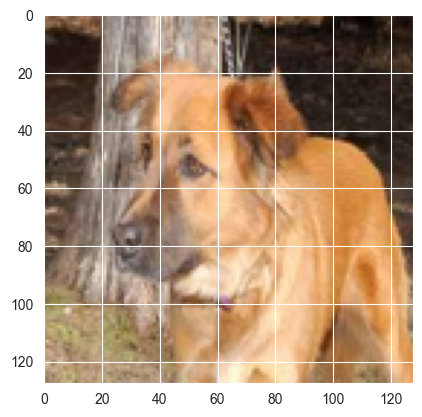

y = 1, prediccion = 1


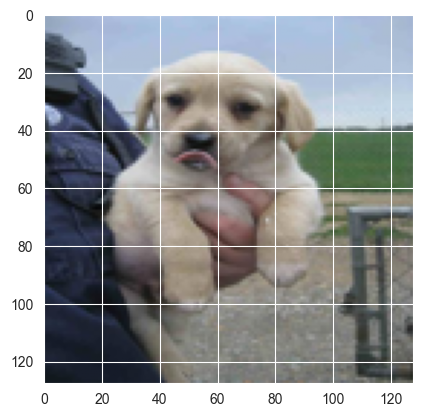

y = 1, prediccion = 0


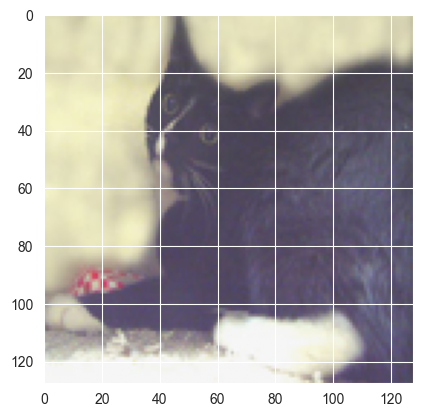

y = 0, prediccion = 0


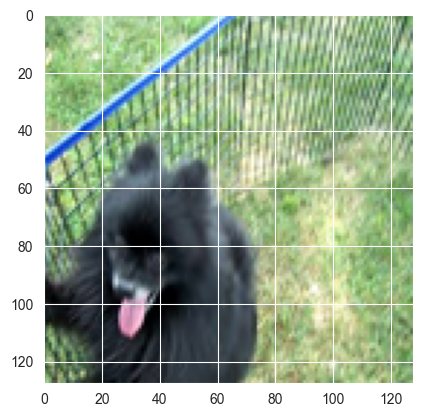

y = 1, prediccion = 0


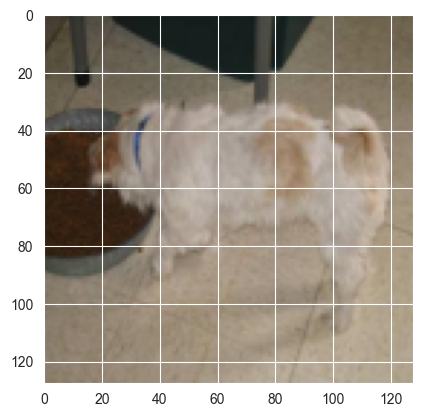

In [457]:
# probando algunos ejemplos del test
for i in range(10):
    index = i
    plt.imshow(train_set_X[:,index].reshape((size, size, 3)))
    print ("y = " + str(y_test[index]) + ", prediccion = " + str(int(logistic_model_regresion["y_prediction_test"][0,index])))
    plt.show()
    

y = 0, prediccion = 1


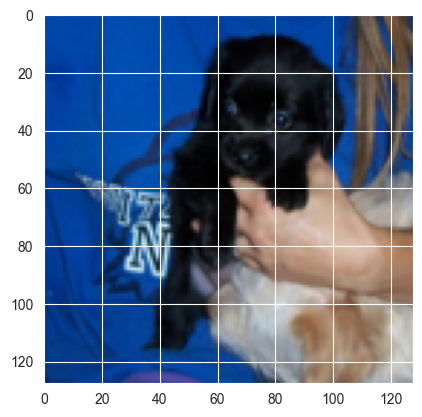

y = 1, prediccion = 0


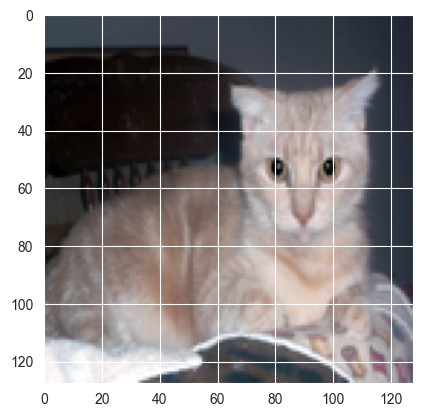

y = 0, prediccion = 0


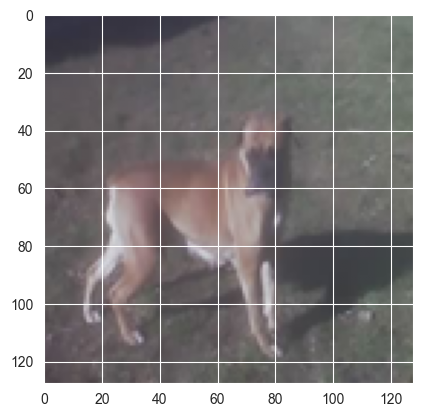

y = 0, prediccion = 1


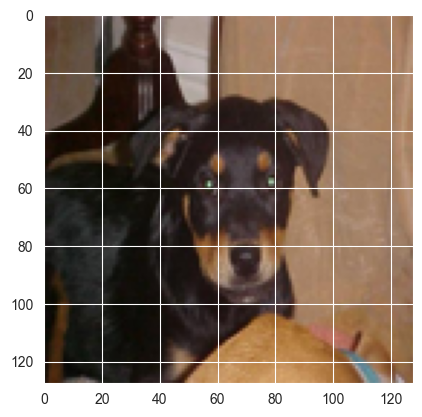

y = 1, prediccion = 1


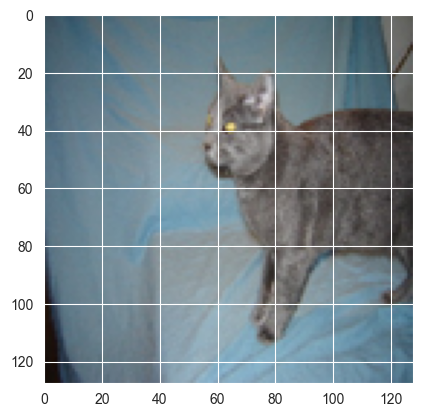

y = 0, prediccion = 0


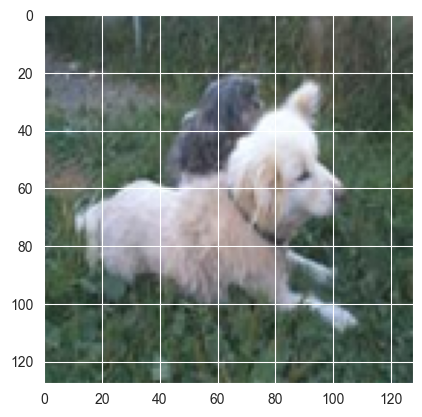

y = 1, prediccion = 1


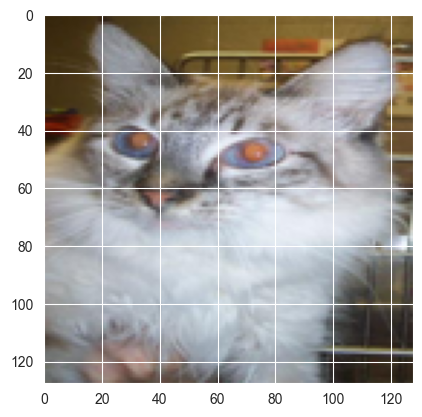

y = 1, prediccion = 0


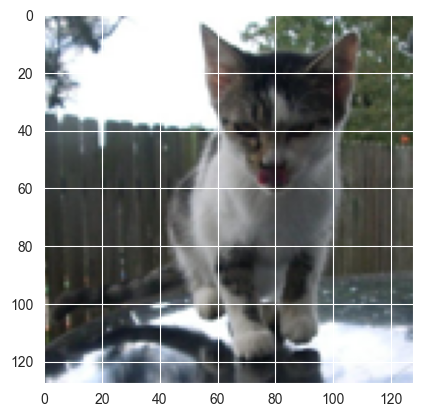

y = 0, prediccion = 0


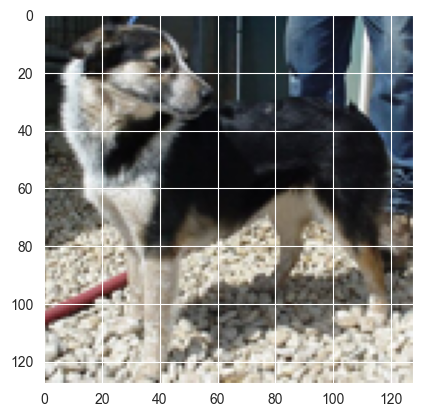

y = 1, prediccion = 0


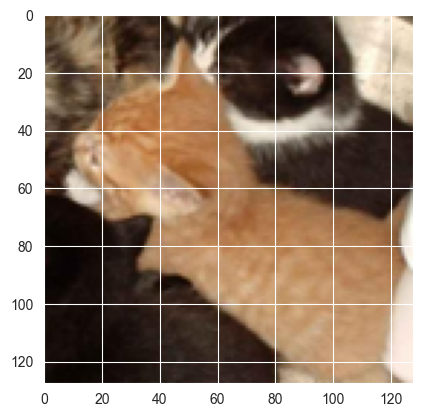

In [458]:
# probando algunos ejemplos del test
for i in range(10):
    index = i
    plt.imshow(test_set_X[:,index].reshape((size, size, 3)))
    print ("y = " + str(y_test[index]) + ", prediccion = " + str(int(logistic_model_regresion["y_prediction_test"][0,index])))
    plt.show()
    

In [460]:
# Guardamos el modelo
import pickle

with open("perceptron.pkl", "wb") as f:
    pickle.dump(logistic_model_regresion, f)